# Prepare Data

In [1]:
# !sudo apt install ffmpeg
%pip install pytube pydub tortoise-tts torch torchaudio librosa soundfile ffprobe pyannote.audio python-dotenv -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
from youtube_utils import get_audio_from_youtube
from audio_processing_utils import read_audio, cut_sound

url = "https://www.youtube.com/live/58MALZvMQgA?si=CiH77ZLtxFKtuc8r"

audio_path = get_audio_from_youtube(url)
audio_path

In [3]:
audio_path = "data/youtube_audio.wav" # Bug

In [4]:
audio, sample_rate = read_audio(audio_path)

# Separate to smaller chunks

In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

MY_ENV_VAR = os.getenv("HF_TOKEN")

In [6]:
%pip install -q torchaudio

Note: you may need to restart the kernel to use updated packages.


In [7]:
SAMPLING_RATE = 16000

import torch

In [8]:
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True,
                              onnx=False)

(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /root/.cache/torch/hub/master.zip


In [9]:
speech_timestamps = get_speech_timestamps(audio, model, sampling_rate=SAMPLING_RATE)
speech_timestamps

KeyboardInterrupt: 

In [ ]:
[{'start': dictionary["start"]/SAMPLING_RATE, 'end': dictionary["end"]/SAMPLING_RATE} for dictionary in speech_timestamps]

[{'start': 46.818, 'end': 47.39},
 {'start': 49.218, 'end': 49.79},
 {'start': 52.162, 'end': 52.862},
 {'start': 54.85, 'end': 55.518},
 {'start': 62.082, 'end': 62.814},
 {'start': 63.202, 'end': 63.774},
 {'start': 64.738, 'end': 65.086},
 {'start': 68.642, 'end': 69.534},
 {'start': 71.554, 'end': 71.998},
 {'start': 75.074, 'end': 75.454},
 {'start': 79.65, 'end': 79.998},
 {'start': 106.21, 'end': 106.654},
 {'start': 117.186, 'end': 117.502},
 {'start': 123.074, 'end': 123.39},
 {'start': 151.746, 'end': 152.382},
 {'start': 167.81, 'end': 168.574},
 {'start': 169.026, 'end': 169.47},
 {'start': 178.018, 'end': 178.366},
 {'start': 186.754, 'end': 187.166},
 {'start': 190.338, 'end': 190.974},
 {'start': 198.978, 'end': 199.55},
 {'start': 206.37, 'end': 206.686},
 {'start': 211.266, 'end': 211.838},
 {'start': 213.026, 'end': 213.374},
 {'start': 213.634, 'end': 214.046},
 {'start': 214.274, 'end': 214.974},
 {'start': 215.33, 'end': 215.838},
 {'start': 236.866, 'end': 237.342

In [ ]:
len(speech_timestamps)

924

Lightning automatically upgraded your loaded checkpoint from v1.1.3 to v2.2.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../.cache/torch/pyannote/models--pyannote--segmentation/snapshots/059e96f964841d40f1a5e755bb7223f76666bba4/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.7.1, yours is 2.3.0+cu121. Bad things might happen unless you revert torch to 1.x.


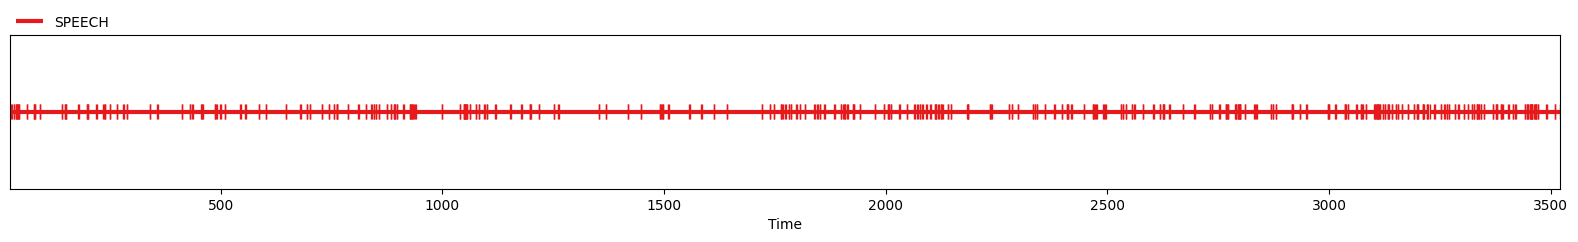

In [ ]:
from pyannote.audio import Pipeline

pipeline = Pipeline.from_pretrained("pyannote/voice-activity-detection",
                                    use_auth_token=MY_ENV_VAR)

output = pipeline(audio_path)
output

In [ ]:
output[:50]

TypeError: 'slice' object is not subscriptable

In [ ]:
list(output.itertracks())

[(<Segment(25.0427, 28.2167)>, 'A'),
 (<Segment(28.9846, 33.285)>, 'B'),
 (<Segment(34.3089, 39.0017)>, 'C'),
 (<Segment(39.4283, 40.9983)>, 'D'),
 (<Segment(41.442, 42.3635)>, 'E'),
 (<Segment(42.8925, 44.9061)>, 'F'),
 (<Segment(45.6399, 62.6536)>, 'G'),
 (<Segment(64.1553, 78.285)>, 'H'),
 (<Segment(79.5819, 81.6126)>, 'I'),
 (<Segment(81.9369, 92.4147)>, 'J'),
 (<Segment(93.0631, 141.578)>, 'K'),
 (<Segment(141.834, 149.053)>, 'L'),
 (<Segment(149.428, 150.23)>, 'M'),
 (<Segment(151.442, 179.053)>, 'N'),
 (<Segment(180.009, 197.637)>, 'O'),
 (<Segment(198.251, 199.991)>, 'P'),
 (<Segment(200.947, 218.166)>, 'Q'),
 (<Segment(221.049, 235.316)>, 'R'),
 (<Segment(235.93, 238.78)>, 'S'),
 (<Segment(238.968, 249.633)>, 'T'),
 (<Segment(249.872, 266.152)>, 'U'),
 (<Segment(266.647, 280.674)>, 'V'),
 (<Segment(281.8, 288.677)>, 'W'),
 (<Segment(288.968, 341.254)>, 'X'),
 (<Segment(341.834, 357.619)>, 'Y'),
 (<Segment(358.148, 413.234)>, 'Z'),
 (<Segment(413.882, 430.913)>, 'AA'),
 (<Segme

In [ ]:
%pip install vad

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from vad import EnergyVAD

# load audio file in "audio" variable

vad = EnergyVAD(energy_threshold=0.02)

voice_activity = vad(audio)
voice_activity

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
time = [x/1000 for x in range(0, len(voice_activity), 20)]

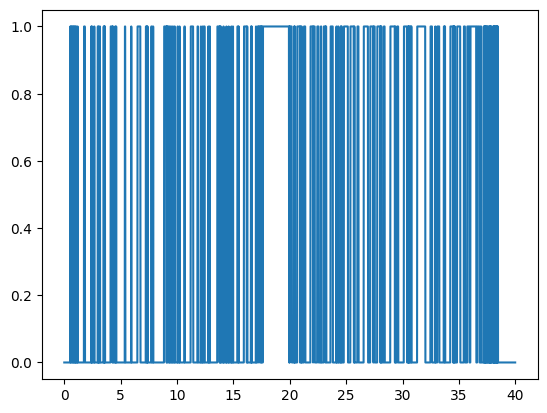

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time[:2000], voice_activity[:2000])
plt.show()

In [ ]:
%pip install auditok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import auditok

# split returns a generator of AudioRegion objects
audio_regions = auditok.split(
    "data/youtube_audio.wav",
    # min_dur=0.2,     # minimum duration of a valid audio event in seconds
    # max_dur=4,       # maximum duration of an event
    # max_silence=2,   # maximum duration of tolerated continuous silence within an event
    # energy_threshold=60 # threshold of detection
)

for i, r in enumerate(audio_regions):

    # Regions returned by `split` have 'start' and 'end' metadata fields
    print("Region {i}: {r.meta.start:.3f}s -- {r.meta.end:.3f}s".format(i=i, r=r))

    # play detection
    # r.play(progress_bar=True)

    # region's metadata can also be used with the `save` method
    # (no need to explicitly specify region's object and `format` arguments)
    # filename = r.save("region_{meta.start:.3f}-{meta.end:.3f}.wav")
    # print("region saved as: {}".format(filename))

Region 0: 0.800s -- 5.800s
Region 1: 5.800s -- 10.800s
Region 2: 10.800s -- 15.800s
Region 3: 15.800s -- 16.650s
Region 4: 25.050s -- 28.400s
Region 5: 28.850s -- 30.200s
Region 6: 30.450s -- 33.250s
Region 7: 34.350s -- 35.900s
Region 8: 36.150s -- 38.650s
Region 9: 39.450s -- 41.000s
Region 10: 41.450s -- 42.600s
Region 11: 42.900s -- 45.100s
Region 12: 45.650s -- 46.900s
Region 13: 47.000s -- 48.750s
Region 14: 48.900s -- 49.550s
Region 15: 50.100s -- 55.100s
Region 16: 55.100s -- 55.800s
Region 17: 55.950s -- 60.950s
Region 18: 60.950s -- 62.850s
Region 19: 64.250s -- 65.850s
Region 20: 66.150s -- 70.950s
Region 21: 71.750s -- 72.450s
Region 22: 72.500s -- 74.500s
Region 23: 74.950s -- 78.450s
Region 24: 79.600s -- 81.850s
Region 25: 81.950s -- 83.100s
Region 26: 83.250s -- 85.000s
Region 27: 85.350s -- 87.700s
Region 28: 88.550s -- 89.750s
Region 29: 89.950s -- 92.600s
Region 30: 93.050s -- 95.800s
Region 31: 96.050s -- 101.050s
Region 32: 101.050s -- 102.450s
Region 33: 102.800s 

In [10]:
from pyannote.audio import Model, Inference

model = Model.from_pretrained("pyannote/segmentation-3.0")
inference = Inference(model)

# inference on the whole file
voice_segmentation = inference("data/youtube_audio.wav")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/dist-packages/pyannote/audio/core/io.py:43: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


In [13]:
%pip install -U pyannote.audio==1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 KB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 68.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 68.9 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 24.0 MB/s eta 0:00:00
  Attempting uninstall: pyannote.audio
    Found existing installation: pyannote.audio 3.1.1
    Uninstalling pyannote.audio-3.1.1:
      Successfully uninstalled pyannote.audio-3.1.1
Note: you may need to restart the kernel to use updated packages.


In [23]:
for x in voice_segmentation:
    print(x)

(<Segment(0, 10)>, array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32))
(<Segment(1, 11)>, array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32))
(<Segment(2, 12)>, array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32))
(<Segment(3, 13)>, array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32))
(<Segment(4, 14)>, array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32))
(<Segment(5, 15)>, array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0.,

...not done

# Translate

In [ ]:
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="facebook/seamless-m4t-v2-large")